In [1]:
from sklearn.svm import LinearSVC, SVC
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GroupKFold
import seaborn as sns
from scipy.stats import pearsonr
from matplotlib.pyplot import MultipleLocator


In [23]:
df_fa = pd.read_csv(r"F:\Code\coupling\python\file\data\SDI_sub\sc_mode_1.csv")
df_md = pd.read_csv(r"F:\Code\coupling\python\file\data\SDI_sub\sc_mode_2.csv")
df_num = pd.read_csv(r"F:\Code\coupling\python\file\data\SDI_sub\sc_mode_3.csv")
df_label = pd.read_csv(r"F:\Code\coupling\python\file\data\SDI_sub\sc_mode_label.csv")
df_info = pd.read_csv(r"F:\Code\coupling\python\file\data\SDI_sub\sc_mode_info.csv")
df_mode = [df_fa, df_md, df_num]




In [28]:
np_fa = np.loadtxt(r"F:\Code\coupling\python\file\data\SDI_sub\sc_mode_1.csv",comments="a",delimiter=',')
np_md = np.loadtxt(r"F:\Code\coupling\python\file\data\SDI_sub\sc_mode_1.csv",comments="a",delimiter=',')
np_num = np.loadtxt(r"F:\Code\coupling\python\file\data\SDI_sub\sc_mode_1.csv",comments="a",delimiter=',')

np_all = np.concatenate([np_md,np_num,np_fa],axis=1)
df_all = pd.DataFrame(np_all)

In [3]:
# 利用sklearn.metrics计算各个评价指标
def cal_metrics(y, y_pred, y_score):
    auc_score = metrics.roc_auc_score(y, y_score)
    acc_score = metrics.accuracy_score(y, y_pred)
    pre_score = metrics.precision_score(y, y_pred)
    recall_score = metrics.recall_score(y, y_pred)
    f1_score = metrics.f1_score(y, y_pred)
    re = [auc_score, acc_score, pre_score, recall_score, f1_score]
    return re


# 声明
df_metrics = pd.DataFrame(columns=["auc", "acc", "pre", "recall", "f1"])


In [4]:
def softmax(X, copy=True):
    """
    Calculate the softmax function.

    The softmax function is calculated by
    np.exp(X) / np.sum(np.exp(X), axis=1)

    This will cause overflow when large values are exponentiated.
    Hence the largest value in each row is subtracted from each data
    point to prevent this.

    Parameters
    ----------
    X : array-like of float of shape (M, N)
        Argument to the logistic function.

    copy : bool, default=True
        Copy X or not.

    Returns
    -------
    out : ndarray of shape (M, N)
        Softmax function evaluated at every point in x.
    """
    if copy:
        X = np.copy(X)
    max_prob = np.max(X, axis=1).reshape((-1, 1))
    X -= max_prob
    np.exp(X, X)
    sum_prob = np.sum(X, axis=1).reshape((-1, 1))
    X /= sum_prob
    return X

In [5]:
import seaborn as sns


def plotReg(x, y, label):
    y = np.array(y)

    df_y = pd.DataFrame(
        data=np.transpose([x, y, label]), columns=["mmse", "ad_pro", "label"]
    )
    fig, ax = plt.subplots(figsize=(4, 4))

    sns.scatterplot(
        data=df_y, x="mmse", y="ad_pro", hue="label", palette=sns.color_palette()
    )

    sns.regplot(
        data=df_y,
        x="mmse",
        y="ad_pro",
        line_kws={"linewidth": 2.5, "color": "black"},
        # color="black",
        scatter=False,
        scatter_kws={
            "s": 15,
            "alpha": 0.7,
        },
    )

    # plt.scatter(y_true_mode,y_pred_mode)

    rp = pearsonr(x, y)

    plt.xlim([-2, 32])
    # plt.ylim([-0.1,1.1])

    x_major_locator = MultipleLocator(10)
    # 把x轴的刻度间隔设置为1，并存在变量里
    y_major_locator = MultipleLocator(0.5)
    ax.xaxis.set_major_locator(x_major_locator)
    # 把x轴的主刻度设置为1的倍数
    ax.yaxis.set_major_locator(y_major_locator)
    print("all, r= " + str(rp[0]) + ", p = " + str(rp[1]))
    # plt.title(modelName+', r= '+ str(rp[0]) +', p = '+ str(rp[1]))

    plt.tick_params(labelsize=12, pad=4, length=8, width=1)
    ax.spines["top"].set_linewidth(1)
    ax.spines["bottom"].set_linewidth(1)
    ax.spines["left"].set_linewidth(1)
    ax.spines["right"].set_linewidth(1)
    plt.show()

    #sns.regplot(data=df_y, x="mmse", y="ad_pro", hue="label")
    fig, ax = plt.subplots(figsize=(4, 4))

    sns.scatterplot(
        data=df_y, x="mmse", y="ad_pro", hue="label", palette=sns.color_palette(),

    )

    sns.regplot(
        data=df_y[df_y['label'] == 2],
        x="mmse",
        y="ad_pro",
        line_kws={"linewidth": 2.5},
        # color="black",
        scatter=False,
        scatter_kws={
            "s": 15,
            "alpha": 0.7,
        },
    )
    sns.regplot(
        data=df_y[df_y['label'] == 3],
        x="mmse",
        y="ad_pro",
        line_kws={"linewidth": 2.5},
        # color="black",
        scatter=False,
        scatter_kws={
            "s": 15,
            "alpha": 0.7,
        },
    )

    # plt.scatter(y_true_mode,y_pred_mode)

    rp_ad = pearsonr(df_y[df_y['label'] == 3]['mmse'].values, 
                  df_y[df_y['label'] == 3]['ad_pro'].values)
    print("AD, r= " + str(rp_ad[0]) + ", p = " + str(rp_ad[1]))
    rp_mc = pearsonr(df_y[df_y['label'] == 2]['mmse'].values, 
                  df_y[df_y['label'] == 2]['ad_pro'].values)
    print("AD, r= " + str(rp_mc[0]) + ", p = " + str(rp_mc[1]))

    plt.xlim([-2, 32])
    # plt.ylim([-0.1,1.1])

    x_major_locator = MultipleLocator(10)
    # 把x轴的刻度间隔设置为1，并存在变量里
    y_major_locator = MultipleLocator(0.5)
    ax.xaxis.set_major_locator(x_major_locator)
    # 把x轴的主刻度设置为1的倍数
    ax.yaxis.set_major_locator(y_major_locator)
    
    # plt.title(modelName+', r= '+ str(rp[0]) +', p = '+ str(rp[1]))

    plt.tick_params(labelsize=12, pad=4, length=8, width=1)
    ax.spines["top"].set_linewidth(1)
    ax.spines["bottom"].set_linewidth(1)
    ax.spines["left"].set_linewidth(1)
    ax.spines["right"].set_linewidth(1)
    plt.show()


[0.09534368070953436, 0.8117647058823529, 0.8787878787878788, 0.7073170731707317, 0.7837837837837839]
0.9046563192904656
[0.14087301587301587, 0.6888888888888889, 0.6, 1.0, 0.7499999999999999]
0.8591269841269842
[0.10247747747747749, 0.7704918032786885, 0.75, 0.625, 0.6818181818181818]
0.8975225225225225
[0.2207792207792208, 0.6481481481481481, 0.5303030303030303, 0.8333333333333334, 0.6481481481481481]
0.7792207792207791
[0.1173878205128205, 0.8058252427184466, 0.84375, 0.84375, 0.84375]
0.8826121794871794
[0.0764790764790765, 0.8703703703703703, 0.85, 0.8095238095238095, 0.8292682926829269]
0.9235209235209235
[0.24448315911730545, 0.6265060240963856, 0.7894736842105263, 0.35714285714285715, 0.4918032786885246]
0.7555168408826946


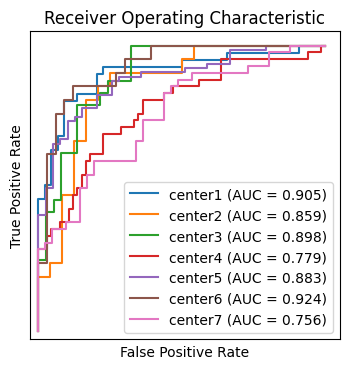

C:\Users\SUN\AppData\Local\Temp\ipykernel_3360\425896094.py:12: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(


all, r= -0.34571950073502383, p = 1.503968612437328e-16


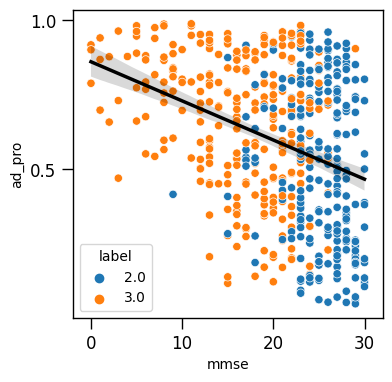

C:\Users\SUN\AppData\Local\Temp\ipykernel_3360\425896094.py:55: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(


AD, r= -0.2633816794677687, p = 6.837243319475299e-06
AD, r= -0.1754468536265512, p = 0.005044878732903436


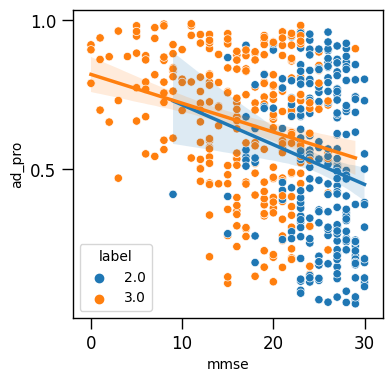

In [32]:
df_metrics_svm = pd.DataFrame(columns=["auc", "acc", "pre", "recall", "f1"])

# 计算三种模态各个的分类性能


fig, ax = plt.subplots(figsize=(4, 4))

MMSE_true = []
AD_pro = []
label_plot = []

# 把fa和info合并成一个表格
mode = 0
df_sc1 = pd.concat([df_md, df_info], join="outer", axis=1)
for i in range(7):
    df = df_sc1.sample(frac=1).reset_index(drop=True)
    # df = df[df['label'] !=2]
    center = i + 1

    # df = df['label'].replace(3,0)
    # df.loc[df['label']==3,'label'] = 0
    # df.loc[df['label']==2,'label'] = 1

    MMSE_true.extend(df[(df["center"] == center) & (df["label"] != 1)]["mmse"])
    label_plot.extend(df[(df["center"] == center) & (df["label"] != 1)]["label"])
    df_test = df[(df["center"] == center) & (df["label"] != 2)].drop(
        axis=1, columns=["center", "mmse"]
    )
    df_train = df[(df["center"] != center) & (df["label"] != 2)].drop(
        axis=1, columns=["center", "mmse"]
    )

    x_test_mci_ad = (
        df[(df["center"] == center) & (df["label"] != 1)]
        .drop(axis=1, columns=["center", "mmse", "label"])
        .values
    )

    y_test = df_test["label"].values
    y_train = df_train["label"].values

    x_test = df_test.drop(axis=1, columns=["label"]).values
    x_train = df_train.drop(axis=1, columns=["label"]).values

    model = SVC(C=2)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    # y_score_1 = model.decision_function(x_test)

    decision = model.decision_function(x_test)
    decision_2d = np.c_[-decision, decision]
    y_score = softmax(decision_2d, copy=False)
    y_score_1 = y_score[:, 0]

    decision = model.decision_function(x_test_mci_ad)
    decision_2d = np.c_[-decision, decision]
    y_score_ad_mci = softmax(decision_2d, copy=False)
    y_score_ad_mci_1 = y_score_ad_mci[:, 1]
    AD_pro.extend(y_score_ad_mci_1)
    print(cal_metrics(y_test, y_pred, y_score_1))
    df_metrics_svm.loc[center + mode * 7] = cal_metrics(y_test, y_pred, y_score_1)

    y_test[y_test == 3] = 0
    fpr, tpr, thresholds = roc_curve(y_test, y_score_1)
    roc_auc = auc(fpr, tpr)
    # plt.plot(fpr, tpr, '#9400D3',label=u'AUC = %0.3f'% roc_auc)
    plt.plot(fpr, tpr, label="center%s (AUC = %0.3f)" % (i + 1, roc_auc))
    # plt.plot( fpr, tpr, label='center%s'% (i+1))
    print(roc_auc)
    df_metrics_svm.loc[center + mode * 7,'auc'] = roc_auc

plt.xticks([])
plt.yticks([])
plt.savefig(
    r"F:\Code\coupling\python\file\picture\svc_cla_tight.png",
    bbox_inches="tight",
    pad_inches=-0.1,
)

plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.xlim([-0.03, 1.05])
plt.ylim([-0.03, 1.05])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

plotReg(MMSE_true, AD_pro, label_plot)


df_metrics_svm.sort_index(inplace=True)

[0.06374722838137473, 0.8352941176470589, 0.9354838709677419, 0.7073170731707317, 0.8055555555555556]
0.9362527716186252
[0.1130952380952381, 0.8222222222222222, 0.7241379310344828, 1.0, 0.8400000000000001]
0.886904761904762
[0.055180180180180186, 0.9016393442622951, 0.875, 0.875, 0.875]
0.9448198198198199
[0.21284271284271283, 0.7037037037037037, 0.578125, 0.8809523809523809, 0.6981132075471698]
0.7871572871572873
[0.14743589743589744, 0.7281553398058253, 0.8913043478260869, 0.640625, 0.7454545454545454]
0.8525641025641026
[0.11832611832611835, 0.7592592592592593, 0.625, 0.9523809523809523, 0.7547169811320755]
0.8816738816738816
[0.24274099883855982, 0.6385542168674698, 0.8333333333333334, 0.35714285714285715, 0.5]
0.7572590011614402


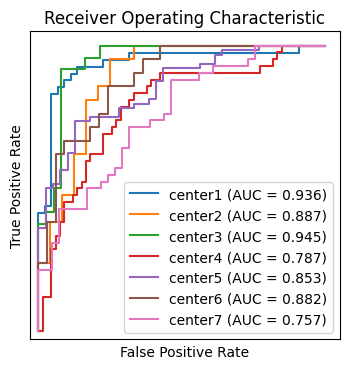

all, r= -0.26265822276199796, p = 6.128103784817945e-10


C:\Users\SUN\AppData\Local\Temp\ipykernel_3360\425896094.py:12: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(


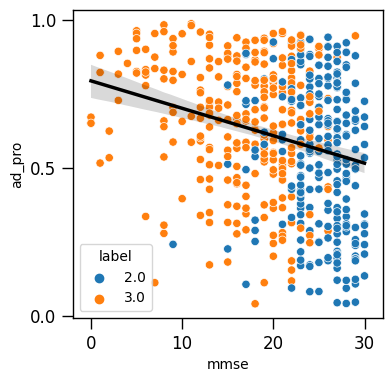

C:\Users\SUN\AppData\Local\Temp\ipykernel_3360\425896094.py:55: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(


AD, r= -0.1407974584586705, p = 0.017590133833881954
AD, r= -0.120262188521822, p = 0.05559934353689209


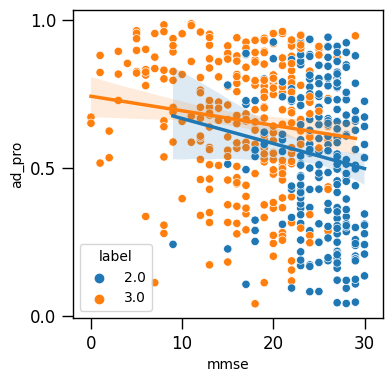

[0.09589800443458982, 0.8117647058823529, 0.8787878787878788, 0.7073170731707317, 0.7837837837837839]
0.9041019955654103
[0.13492063492063494, 0.6666666666666666, 0.5833333333333334, 1.0, 0.7368421052631579]
0.8650793650793651
[0.08108108108108109, 0.819672131147541, 0.8095238095238095, 0.7083333333333334, 0.7555555555555556]
0.918918918918919
[0.19733044733044736, 0.7129629629629629, 0.5873015873015873, 0.8809523809523809, 0.7047619047619047]
0.8026695526695525
[0.11899038461538462, 0.8058252427184466, 0.8333333333333334, 0.859375, 0.8461538461538461]
0.8810096153846153
[0.060606060606060615, 0.8333333333333334, 0.75, 0.8571428571428571, 0.7999999999999999]
0.9393939393939394
[0.26074332171893144, 0.5903614457831325, 0.7222222222222222, 0.30952380952380953, 0.4333333333333334]
0.7392566782810686


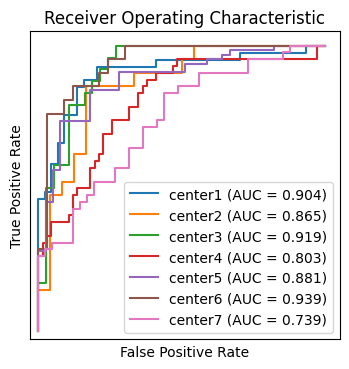

all, r= -0.32497461999512917, p = 1.0669195957798259e-14


C:\Users\SUN\AppData\Local\Temp\ipykernel_3360\425896094.py:12: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(


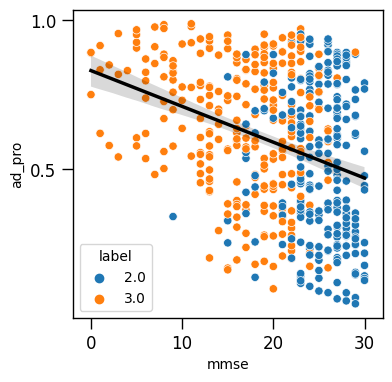

C:\Users\SUN\AppData\Local\Temp\ipykernel_3360\425896094.py:55: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(


AD, r= -0.2376016920248241, p = 5.242481730406919e-05
AD, r= -0.1302194770619257, p = 0.03808309366347705


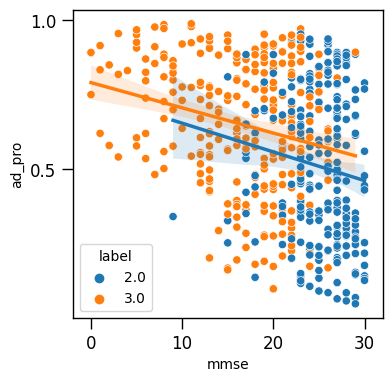

[0.03547671840354767, 0.8941176470588236, 0.8478260869565217, 0.9512195121951219, 0.8965517241379309]
0.9645232815964524
[0.12896825396825395, 0.7777777777777778, 0.7391304347826086, 0.8095238095238095, 0.7727272727272727]
0.871031746031746
[0.16554054054054054, 0.6721311475409836, 0.5555555555555556, 0.8333333333333334, 0.6666666666666667]
0.8344594594594594
[0.2882395382395382, 0.6759259259259259, 0.559322033898305, 0.7857142857142857, 0.6534653465346535]
0.7117604617604617
[0.1734775641025641, 0.5436893203883495, 0.9473684210526315, 0.28125, 0.43373493975903615]
0.8265224358974359
[0.10101010101010101, 0.7407407407407407, 0.6, 1.0, 0.7499999999999999]
0.898989898989899
[0.10743321718931478, 0.7951807228915663, 0.9310344827586207, 0.6428571428571429, 0.7605633802816901]
0.8925667828106852


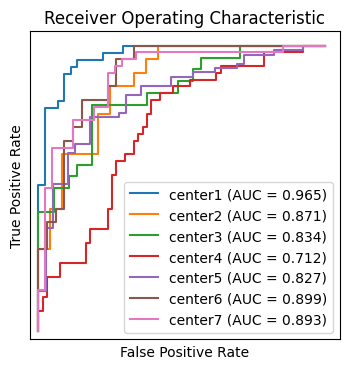

all, r= -0.09783734193132593, p = 0.023238602437781482


C:\Users\SUN\AppData\Local\Temp\ipykernel_3360\425896094.py:12: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(


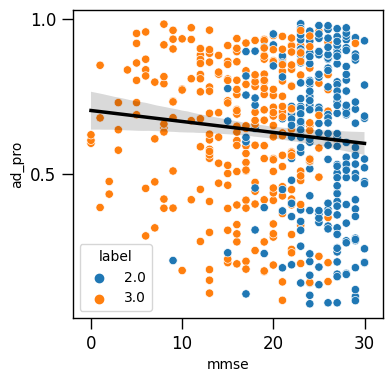

C:\Users\SUN\AppData\Local\Temp\ipykernel_3360\425896094.py:55: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(


AD, r= -0.047618360056219784, p = 0.4240624260499634
AD, r= -0.08010940217780985, p = 0.20320176795904596


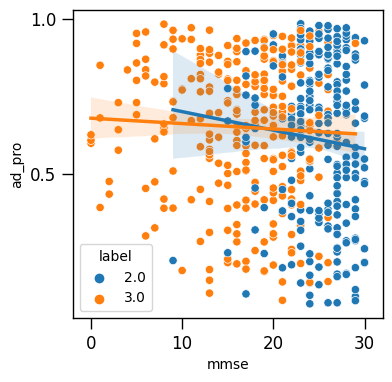

In [12]:
df_metrics_svm = pd.DataFrame(columns=["auc", "acc", "pre", "recall", "f1"])

# 计算三种模态各个的分类性能
for mode in range(3):

    fig, ax = plt.subplots(figsize=(4, 4))

    MMSE_true = []
    AD_pro = []
    label_plot = []

    # 把fa和info合并成一个表格
    df_sc1 = pd.concat([df_mode[mode], df_info], join="outer", axis=1)
    for i in range(7):
        df = df_sc1.sample(frac=1).reset_index(drop=True)
        # df = df[df['label'] !=2]
        center = i + 1

        # df = df['label'].replace(3,0)
        # df.loc[df['label']==3,'label'] = 0
        # df.loc[df['label']==2,'label'] = 1

        MMSE_true.extend(df[(df["center"] == center) & (df["label"] != 1)]["mmse"])
        label_plot.extend(df[(df["center"] == center) & (df["label"] != 1)]["label"])
        df_test = df[(df["center"] == center) & (df["label"] != 2)].drop(
            axis=1, columns=["center", "mmse"]
        )
        df_train = df[(df["center"] != center) & (df["label"] != 2)].drop(
            axis=1, columns=["center", "mmse"]
        )

        x_test_mci_ad = (
            df[(df["center"] == center) & (df["label"] != 1)]
            .drop(axis=1, columns=["center", "mmse", "label"])
            .values
        )

        y_test = df_test["label"].values
        y_train = df_train["label"].values

        x_test = df_test.drop(axis=1, columns=["label"]).values
        x_train = df_train.drop(axis=1, columns=["label"]).values

        model = SVC()
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        # y_score_1 = model.decision_function(x_test)

        decision = model.decision_function(x_test)
        decision_2d = np.c_[-decision, decision]
        y_score = softmax(decision_2d, copy=False)
        y_score_1 = y_score[:, 0]

        decision = model.decision_function(x_test_mci_ad)
        decision_2d = np.c_[-decision, decision]
        y_score_ad_mci = softmax(decision_2d, copy=False)
        y_score_ad_mci_1 = y_score_ad_mci[:, 1]
        AD_pro.extend(y_score_ad_mci_1)
        print(cal_metrics(y_test, y_pred, y_score_1))
        df_metrics_svm.loc[center + mode * 7] = cal_metrics(y_test, y_pred, y_score_1)

        y_test[y_test == 3] = 0
        fpr, tpr, thresholds = roc_curve(y_test, y_score_1)
        roc_auc = auc(fpr, tpr)
        # plt.plot(fpr, tpr, '#9400D3',label=u'AUC = %0.3f'% roc_auc)
        plt.plot(fpr, tpr, label="center%s (AUC = %0.3f)" % (i + 1, roc_auc))
        # plt.plot( fpr, tpr, label='center%s'% (i+1))
        print(roc_auc)
        df_metrics_svm.loc[center + mode * 7,'auc'] = roc_auc

    plt.xticks([])
    plt.yticks([])
    plt.savefig(
        r"F:\Code\coupling\python\file\picture\svc_cla_tight.png",
        bbox_inches="tight",
        pad_inches=-0.1,
    )

    plt.title("Receiver Operating Characteristic")
    plt.legend(loc="lower right")
    plt.xlim([-0.03, 1.05])
    plt.ylim([-0.03, 1.05])
    plt.ylabel("True Positive Rate")
    plt.xlabel("False Positive Rate")
    plt.show()

    plotReg(MMSE_true, AD_pro, label_plot)


df_metrics_svm.sort_index(inplace=True)



In [14]:
df_metrics_svm.to_csv(r'F:\Code\coupling\python\utils\classification\df_metrics_svm.csv')

0.9362527716186252
0.886904761904762
0.9448198198198199
0.7871572871572873
0.8525641025641026
0.8816738816738816
0.7572590011614402


FileNotFoundError: [Errno 2] No such file or directory: '/home/syb/Code/coupling/data/to_local/svc/svc_cla_tight.png'

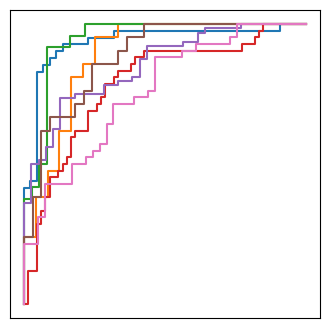

In [6]:
#独立中心的AD-probality 
df_metrics_svm = pd.DataFrame(columns = ['auc','acc','pre','recall','f1'])

#计算三种模态各个的分类性能
for mode in range(3):

    fig, ax = plt.subplots(figsize=(4, 4))

    MMSE_true = []
    AD_pro = []
    label_plot = []
    

    #把fa和info合并成一个表格
    df_sc1= pd.concat([df_mode[mode],df_info],join="outer",axis=1)
    for i in range(7):
        df = df_sc1.sample(frac=1).reset_index(drop=True)
        #df = df[df['label'] !=2]
        center = i+1
        
        #df = df['label'].replace(3,0)
        # df.loc[df['label']==3,'label'] = 0
        # df.loc[df['label']==2,'label'] = 1

       
        MMSE_true.extend( df[(df['center']== center)& (df['label'] !=1)]['mmse'])
        label_plot.extend( df[(df['center']== center)& (df['label'] !=1)]['label'])
        df_test = df[(df['center']== center)& (df['label'] !=2)].drop(axis=1,columns=['center','mmse'])
        df_train = df[(df['center'] != center) & (df['label'] !=2)].drop(axis=1,columns=['center','mmse'])
        
        x_test_mci_ad = df[(df['center']== center)& (df['label'] !=1)].drop(axis=1,columns=['center','mmse','label']).values
        
        y_test = df_test['label'].values
        y_train = df_train['label'].values

        
        x_test = df_test.drop(axis=1,columns=['label']).values
        x_train = df_train.drop(axis=1,columns=['label']).values
        
        model = SVC()
        model.fit(x_train,y_train)
        y_pred = model.predict(x_test)
        #y_score_1 = model.decision_function(x_test)

        decision = model.decision_function(x_test)     
        decision_2d = np.c_[-decision, decision]
        y_score = softmax(decision_2d, copy=False)
        y_score_1 = y_score[:,0]

        decision = model.decision_function(x_test_mci_ad)     
        decision_2d = np.c_[-decision, decision]
        y_score_ad_mci = softmax(decision_2d, copy=False)
        y_score_ad_mci_1 = y_score_ad_mci[:,1]
        AD_pro.extend(y_score_ad_mci_1)

        df_metrics_svm.loc[center+mode*7]= cal_metrics(y_test,y_pred,y_score_1)

        y_test[y_test ==3] = 0
        fpr, tpr, thresholds = roc_curve(y_test,y_score_1)
        roc_auc = auc(fpr, tpr)
        #plt.plot(fpr, tpr, '#9400D3',label=u'AUC = %0.3f'% roc_auc)
        plt.plot( fpr, tpr, label='center%s (AUC = %0.3f)'% (i+1,roc_auc))
        #plt.plot( fpr, tpr, label='center%s'% (i+1))
        print(roc_auc)


    plt.xticks([])
    plt.yticks([])
    plt.savefig('/home/syb/Code/coupling/data/to_local/svc/svc_cla_tight.png',bbox_inches='tight', pad_inches = -0.1)      
        
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.xlim([-0.03,1.05])
    plt.ylim([-0.03,1.05])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show() 

    plotReg(MMSE_true,AD_pro,label_plot)


df_metrics_svm.sort_index(inplace=True)

0.9362527716186252
0.886904761904762
0.9448198198198199
0.7871572871572873
0.8525641025641026
0.8816738816738816
0.7572590011614402


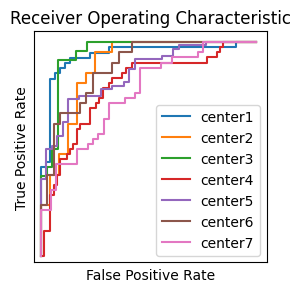

0.9041019955654103
0.8650793650793651
0.918918918918919
0.8026695526695525
0.8810096153846153
0.9393939393939394
0.7392566782810686


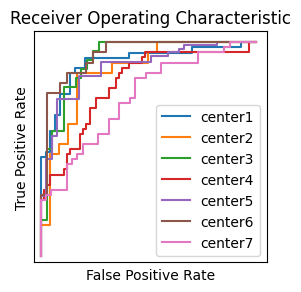

0.9645232815964524
0.871031746031746
0.8344594594594594
0.7117604617604617
0.8265224358974359
0.898989898989899
0.8925667828106852


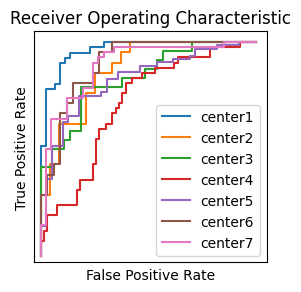

In [24]:
#画多种结果图


df_metrics_lr = pd.DataFrame(columns = ['auc','acc','pre','recall','f1'])
df_metrics_svm = pd.DataFrame(columns = ['auc','acc','pre','recall','f1'])
df_metrics_rf = pd.DataFrame(columns = ['auc','acc','pre','recall','f1'])

#计算三种模态各个的分类性能
for mode in range(3):

    fig, ax = plt.subplots(figsize=(3, 3))

    #把fa和info合并成一个表格
    df_sc1= pd.concat([df_mode[mode],df_info],join="outer",axis=1)
    for i in range(7):
        df = df_sc1.sample(frac=1).reset_index(drop=True)
        df = df[df['label'] !=2]
        center = i+1
        
        #df = df['label'].replace(3,0)
        df.loc[df['label']==3,'label'] = 0#
        df_test = df[df['center']== center].drop(axis=1,columns=['center','mmse'])
        df_train = df[df['center'] != center].drop(axis=1,columns=['center','mmse'])
        
        y_test = df_test['label'].values
        y_train = df_train['label'].values

        df_test= df_test.drop(axis=1,columns=['label'])
        x_test = df_test.values
        x_train = df_train.drop(axis=1,columns=['label']).values
        
        model = LogisticRegression(penalty="l2", C=0.5, solver="liblinear")
        model.fit(x_train,y_train)
        y_de = model.decision_function(x_test)
        y_score = model.predict_proba(x_test)
        y_score_1 = y_score[:,1]
        y_pred = model.predict(x_test)
        df_metrics_lr.loc[center+mode*7]= cal_metrics(y_test,y_pred,y_score_1)

        model = SVC(tol=0.001)
        model.fit(x_train,y_train)
        y_pred = model.predict(x_test)
        y_score_1 = model.decision_function(x_test)
        df_metrics_svm.loc[center+mode*7]= cal_metrics(y_test,y_pred,y_score_1)

        fpr, tpr, thresholds = roc_curve(y_test,y_score_1)
        roc_auc = auc(fpr, tpr)
        #plt.plot(fpr, tpr, '#9400D3',label=u'AUC = %0.3f'% roc_auc)
        plt.plot( fpr, tpr, label='center%s (AUC = %0.3f)'% (i+1,roc_auc))
        #plt.plot( fpr, tpr, label='center%s'% (i+1))
        print(roc_auc)

        model = RandomForestClassifier(n_estimators=50)
        model.fit(x_train,y_train)
        y_pred = model.predict(x_test)
        y_score = model.predict_proba(x_test)
        y_score_1 = y_score[:,1]
        df_metrics_rf.loc[center+mode*7]= cal_metrics(y_test,y_pred,y_score_1)

    
    plt.xticks([])
    plt.yticks([])
    plt.savefig('/home/syb/Code/coupling/data/to_local/svc/svc_cla_tight.png',bbox_inches='tight', pad_inches = -0.1)      
        
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.xlim([-0.03,1.05])
    plt.ylim([-0.03,1.05])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show() 


df_metrics_rf.sort_index(inplace=True)
df_metrics_lr.sort_index(inplace=True)
df_metrics_svm.sort_index(inplace=True)

0.9362527716186252
0.886904761904762
0.9448198198198199
0.7871572871572873
0.8525641025641026
0.8816738816738816
0.7572590011614402


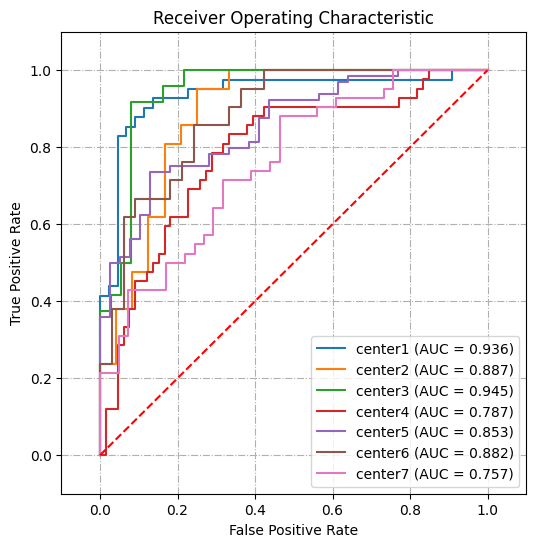

0.9412416851441242
0.886904761904762
0.9414414414414415
0.7907647907647907
0.8513621794871795
0.84992784992785
0.7491289198606272


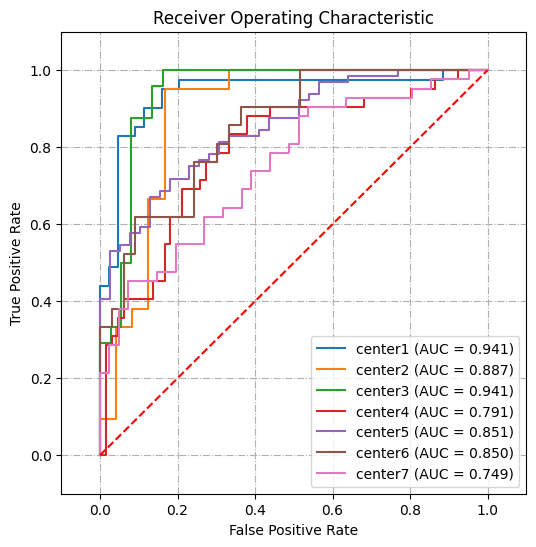

0.9434589800443459
0.878968253968254
0.920045045045045
0.7940115440115441
0.842548076923077
0.8354978354978355
0.7491289198606272


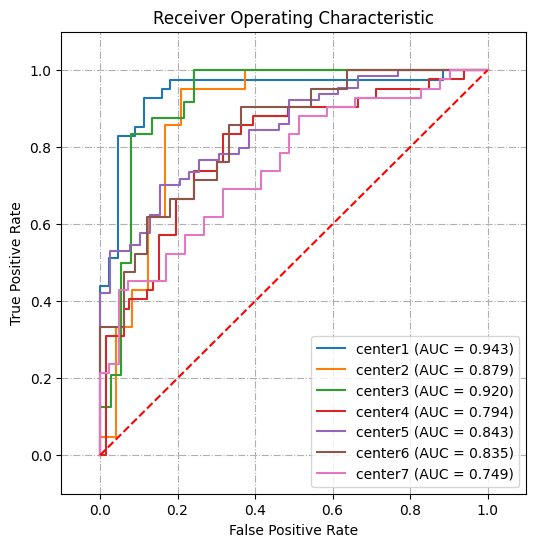

0.9467849223946786
0.869047619047619
0.9155405405405405
0.7886002886002886
0.8393429487179487
0.8210678210678211
0.7439024390243902


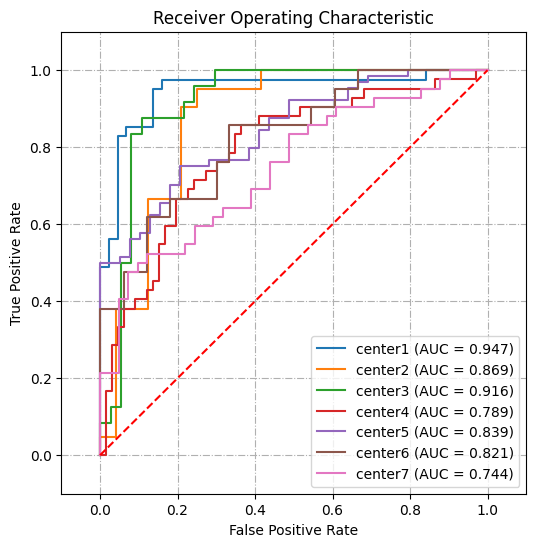

0.9429046563192903
0.863095238095238
0.9076576576576576
0.7882395382395382
0.8345352564102565
0.8023088023088023
0.7380952380952381


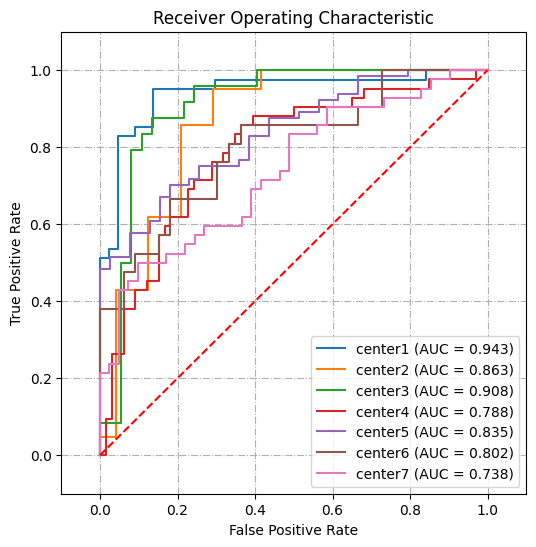

0.9434589800443458
0.8630952380952381
0.9031531531531531
0.7867965367965368
0.829326923076923
0.8095238095238094
0.7398373983739838


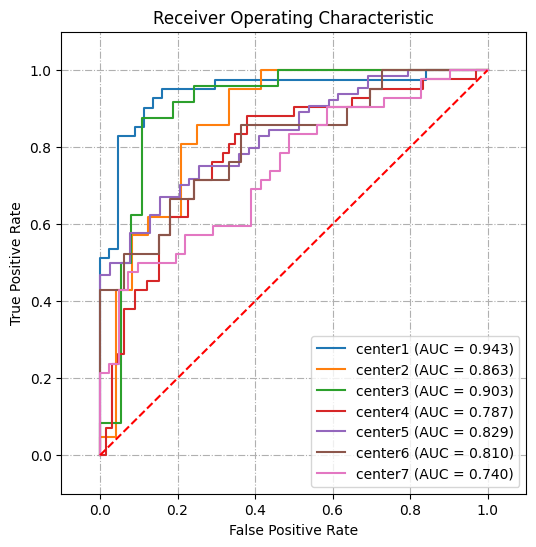

0.9412416851441241
0.85515873015873
0.8986486486486487
0.7875180375180375
0.8253205128205129
0.8124098124098124
0.7369337979094077


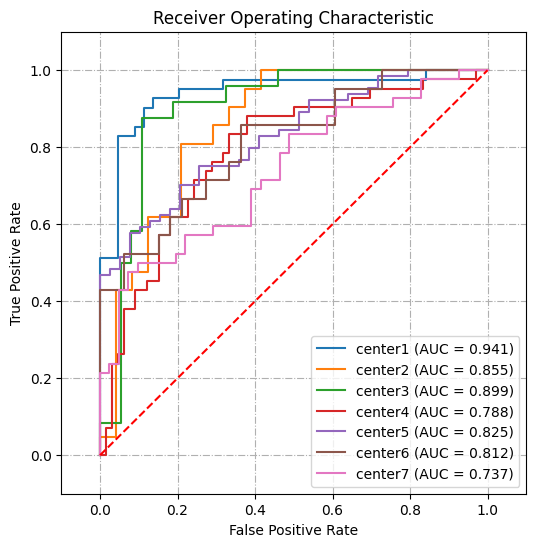

0.9412416851441241
0.85515873015873
0.8975225225225225
0.7875180375180375
0.8253205128205129
0.8167388167388168
0.7375145180023229


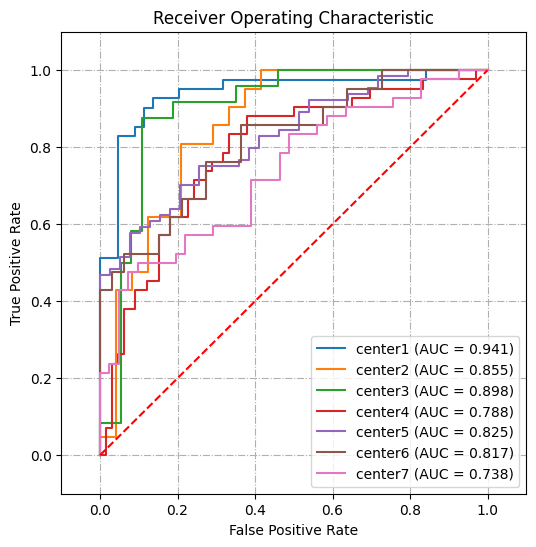

0.9412416851441241
0.85515873015873
0.8975225225225225
0.7875180375180375
0.8253205128205129
0.8167388167388168
0.7375145180023229


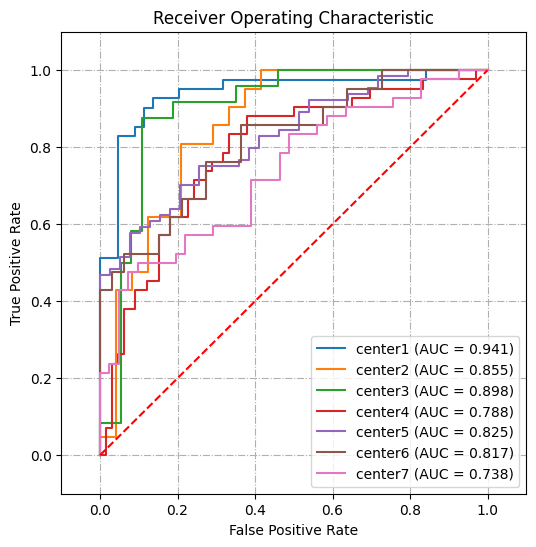

0.9412416851441241
0.85515873015873
0.8975225225225225
0.7875180375180375
0.8253205128205129
0.8167388167388168
0.7375145180023229


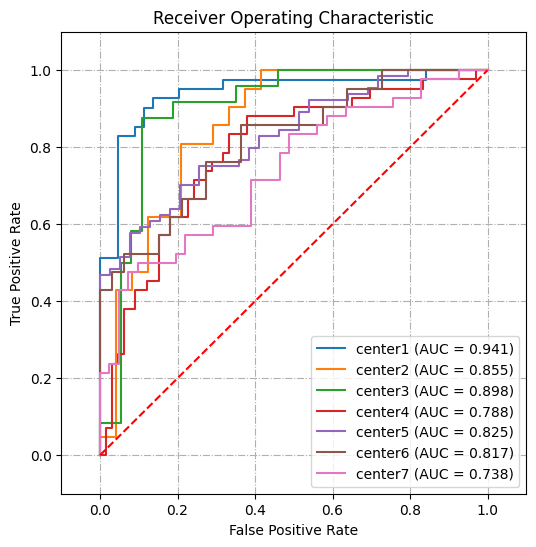

In [5]:
#寻找不同c值下的svc的分类性能

df_metrics_svm_testc = pd.DataFrame(columns = ['c','auc','acc','pre','recall','f1'])

#把fa和info合并成一个表格
for c in range(10):
    fig, ax = plt.subplots(figsize=(6, 6))
    df_fa_1= pd.concat([df_fa,df_info],join="outer",axis=1)
    for i in range(7):
        df = df_fa_1.sample(frac=1).reset_index(drop=True)
        df = df[df['label'] !=2]
        center = i+1
        
        #df = df['label'].replace(3,0)
        df.loc[df['label']==3,'label'] = 0#
        df_test = df[df['center']== center].drop(axis=1,columns=['center','mmse'])
        df_train = df[df['center'] != center].drop(axis=1,columns=['center','mmse'])
        
        y_test = df_test['label'].values
        y_train = df_train['label'].values

        df_test= df_test.drop(axis=1,columns=['label'])
        x_test = df_test.values
        x_train = df_train.drop(axis=1,columns=['label']).values
        
        model = SVC(C=c+1)
        model.fit(x_train,y_train)
        y_pred = model.predict(x_test)
        
        y_score_1 = model.decision_function(x_test)
        a= cal_metrics(y_test,y_pred,y_score_1)
        a.insert(0,c)
          
        df_metrics_svm_testc.loc[center + c*7]= a

        fpr, tpr, thresholds = roc_curve(y_test,y_score_1)
        roc_auc = auc(fpr, tpr)
        #plt.plot(fpr, tpr, '#9400D3',label=u'AUC = %0.3f'% roc_auc)
        plt.plot( fpr, tpr, label='center%s (AUC = %0.3f)'% (i+1,roc_auc))
        print(roc_auc)


    plt.title('Receiver Operating Characteristic')

    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.1])
    plt.ylim([-0.1,1.1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.grid(linestyle='-.')  
    plt.grid(True)
    plt.show() 

df_metrics_svm_testc.sort_index(inplace=True)


/home/syb/anaconda3/envs/pycaret-3/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


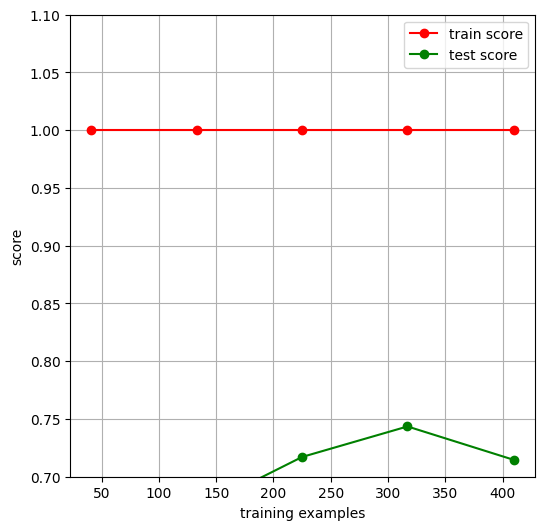

In [6]:

df_fa_1= pd.concat([df_fa,df_info],join="outer",axis=1)


for i in range(7):
    a=1

if True:
    i=6
    df = df_fa_1.sample(frac=1).reset_index(drop=True)
    df = df[df['label'] !=2]
    df_test = df[df['center']== i+1].drop(axis=1,columns=['center','mmse'])
    df_train = df[df['center'] != i+1].drop(axis=1,columns=['center','mmse'])
    y_test = df_test['label'].values
    y_train = df_train['label'].values

    df_test= df_test.drop(axis=1,columns=['label'])
    x_test = df_test.values
    x_train = df_train.drop(axis=1,columns=['label']).values

    
    model = LinearSVC()
    model.fit(x_train,y_train)
    

    y_pred = model.predict(x_test)
    
    
    #df_metrics = cal_metrics(y_test,y_pred,df_metrics)

    train_sizes,train_scores,test_scores=learning_curve(
        RandomForestClassifier(n_estimators=50),x_train, y_train,cv=10,n_jobs=-1)
    # 设置分类器为随机森林，x，y，5折交叉验证，cpu同时运算为4个

    fig,ax=plt.subplots(1,1,figsize=(6,6))
    ax.set_ylim((0.7,1.1)) # 设置子图的纵坐标的范围为（0.7~1.1）
    ax.set_xlabel("training examples") # 设置子图的x轴名称
    ax.set_ylabel("score")
    ax.grid() # 画出网图
    ax.plot(train_sizes,np.mean(train_scores,axis=1),'o-',color='r',label='train score')
    # 画训练集数据分数，横坐标为用作训练的样本数，纵坐标为不同折下的训练分数的均值
    ax.plot(train_sizes,np.mean(test_scores,axis=1),'o-',color='g',label='test score')
    ax.legend(loc='best') # 设置图例

    plt.show()

In [7]:
print(df_metrics_lr.mean())
print(df_metrics_svm.mean())

auc       0.821206
acc       0.733953
pre       0.743191
recall    0.716562
f1        0.708256
dtype: float64
c         4.500000
auc       0.844824
acc       0.759478
pre       0.781793
recall    0.740817
f1        0.734160
dtype: float64
